# Portfolio Project
***
## Background
For this project, you will act as a data researcher for the World Health Organization. You will analyse data on GDP and life expectancy sourced from the World Health Organization and the World Bank. The goal is to investigate the connection between the GDP and life expectancy of six specific countries.

During this project, you will prepare, analyse, and plot data in order to answer questions in a meaningful way.

Following the completion of your analysis, you’ll be creating a blog post to share your findings on the World Health Organization website.
***
## Ask
### Goal
To identify the relationship between the GDP and life expectancy of six specific countries.
### Questions
- Has life expectancy increased over time in the six nations?
- Has GDP increased over time in the six nations?
- Is there a correlation between GDP and life expectancy of a country?
- What is the average life expectancy in these nations?
- What is the distribution of that life expectancy?
***
## Prepare
### Data Sources
- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)
### Import Python Packages

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

### Load the Data

In [3]:
data = pd.read_csv("all_data.csv")
data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [4]:
data.shape

(96, 4)

### Explore the Data

What years are represented in the data?

In [5]:
print(data.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


There are six specific countries represented in the data, include Chile, China, Germany, Mexico, United States of America, Zimbabwe.

In [6]:
print(data.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


#### Rename the column
Use `.rename()`function to change the column name
Run `data.head()` function to check the new column name

In [7]:
data = data.rename({"Life expectancy at birth (years)":"LEABY"}, axis = "columns")
data.head()

,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


## Porcess
### Distributions
- What is the distribution of GDP?

The data shows a pronounced right-skewed distribution of `GDP`, with a majority of values concentrated on the left side.

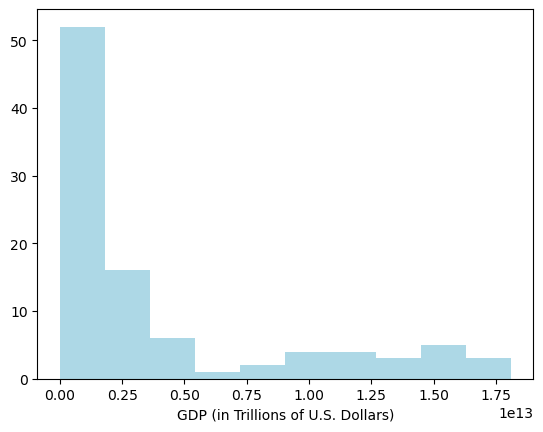

In [14]:
plt.hist(data['GDP'], color ='lightblue')
plt.xlabel('GDP (in Trillions of U.S. Dollars)')
plt.show()

- What is the distribution of life expectancy?

The `LEABY` distribution in the dataset demonstrates a distinct leftward skew, with the majority of values concentrated on the right side. This contrasts with the observed pattern in the `GDP` column, indicating an almost inverse relationship. A closer look may reveal different modes or smaller groupings of distributions within the overall range.

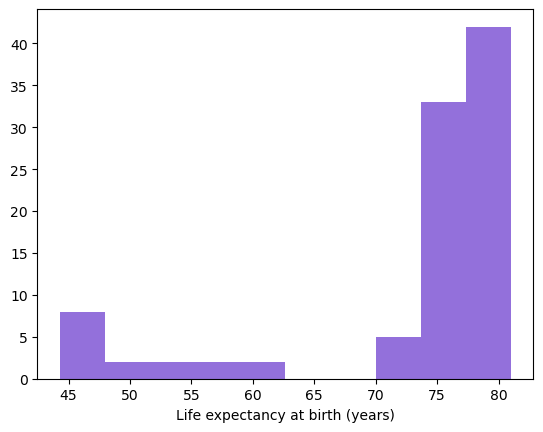

In [15]:
plt.hist(data['LEABY'], color = 'mediumpurple')
plt.xlabel('Life expectancy at birth (years)')
plt.show()

### Compare Average
After organising the data by country and calculating the mean values for life expectancy (LEEABY) and GDP, bar plots were generated to display these mean values.

- What is the average life expectancy in these nations?

In the first bar chart shows average life expectancy, most countries exhibit values ranging from the mid to high 70s, with the exception of Zimbabwe which was 50. This most likely explains the previously observed distribution skew.

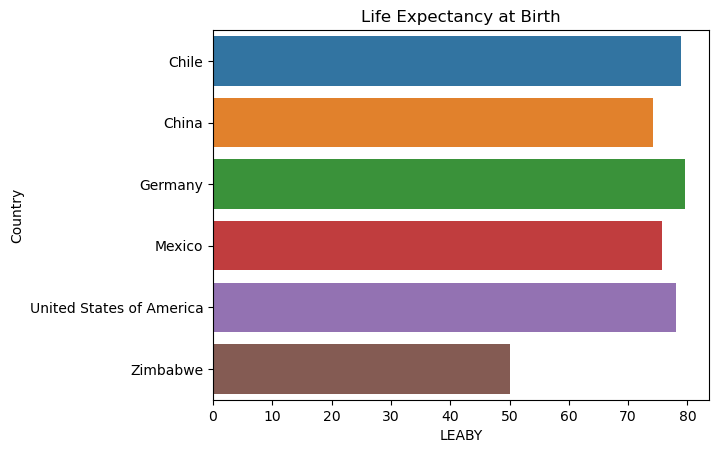

In [16]:
Means = data.drop("Year", axis = 1).groupby("Country").mean().reset_index()


sns.barplot(x="LEABY", y="Country", data=Means).set(title="Life Expectancy at Birth")
plt.show()

In the second bar plot illustrates the average GDP by country, the United States of America notably shows a significantly higher value in contrast to the other nations. Zimbabwe is conspicuously absent from the plot, while Chile's representation is minimal. In contrast, the United States of America demonstrates a substantial GDP compared to the other countries, while China, Germany, and Mexico appear to have relatively similar figures.

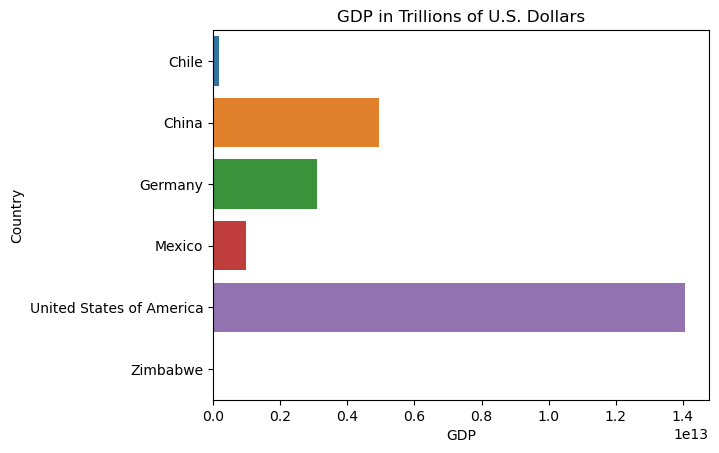

In [17]:
sns.barplot(x="GDP", y="Country", data=Means).set(title="GDP in Trillions of U.S. Dollars")
plt.show()

## Analyse
### Violin Plots  To Compare GDP and Life Expectancy Distributions
In the `GDP` plot on the left, China and the US exhibit a relatively broad range, whereas Zimbabwe, Chile, and Mexico have narrower ranges. Conversely, in the `LEABY` plot on the right, most countries demonstrate shorter ranges, except for Zimbabwe, which spans from the high 30s to the high 60s.

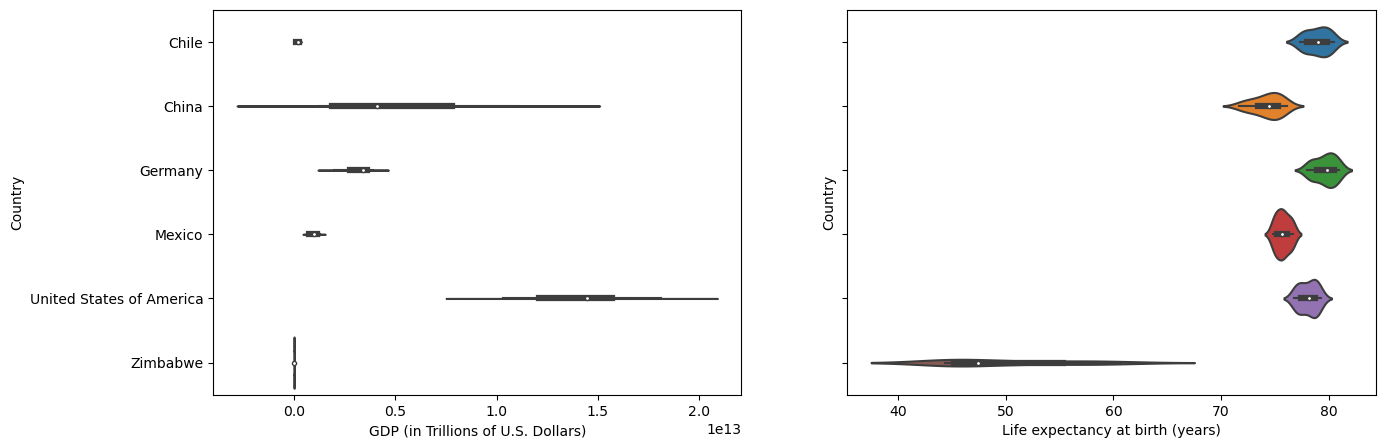

In [42]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
axes[0] = sns.violinplot(ax=axes[0], x=data.GDP, y=data.Country).set_xlabel("GDP (in Trillions of U.S. Dollars)")
axes[1] = sns.violinplot(ax=axes[1], x=data.LEABY, y=data.Country).set_xlabel("Life expectancy at birth (years)")
plt.show()


### GDP and Life Expectancy Over Time
- Is there a correlation between GDP and life expectancy of a country?

This section explores the relationship between `GDP` and `LEABY`. In the chart below, it cab be seen that GDP for Zimbabwe is staying flat, while their life expectancy is going up. For the other countries, there appears to be a correlation between increasing GDP and rising life expectancy. Interestingly, both the United States of America and China seem to have very similar trends, with their GDPs positively impacting life expectancy.

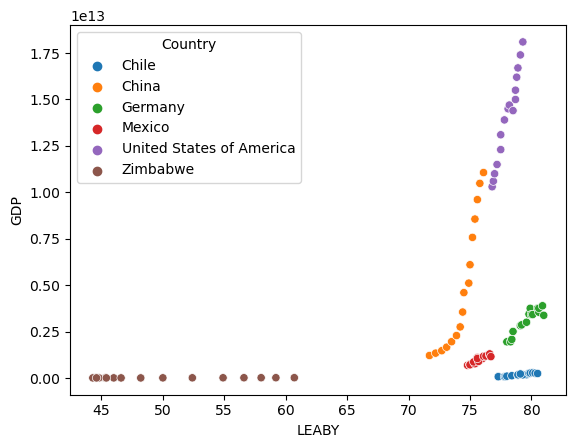

In [44]:
sns.scatterplot(x=data.LEABY, y=data.GDP, hue=data.Country)
plt.show()

In each facet plot, countries are broken out to observe their unique relationships between GDP and life expectancy. Looking at each country, countries such as the US, Mexico, and Zimbabwe display linear patterns, suggesting a consistent increase in life expectancy with GDP growth. However, China's relationship appears slightly exponential, while Chile's resembles a bit logarithmic. Despite these variations, overall trends show a positive correlation between GDP and life expectancy across countries, indicating that as GDP increases, life expectancy tends to rise as well. 

/Users/joanna/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


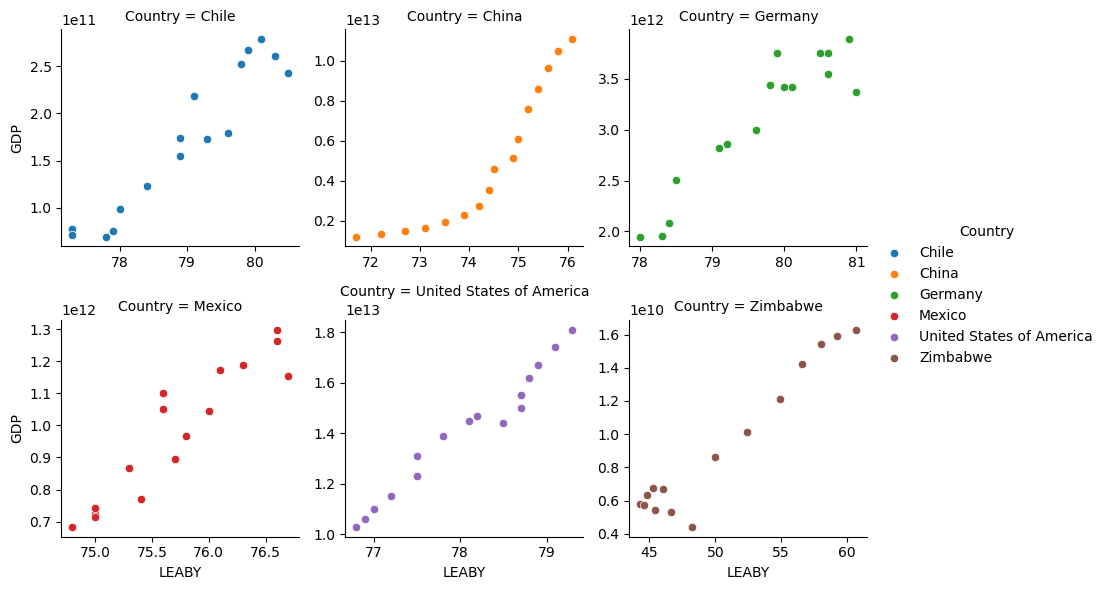

In [45]:
graph1 = sns.FacetGrid(data, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex = False)
graph1 = (graph1.map(sns.scatterplot,"LEABY", "GDP")
         .add_legend()
         .set_axis_labels("LEABY", "GDP"));


The scatter plots below show the relationship between life expectancy at birth (`LEABY`) and `GDP` for different countries over various years. Each point on the plot represents a specific country in a given year.

/Users/joanna/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


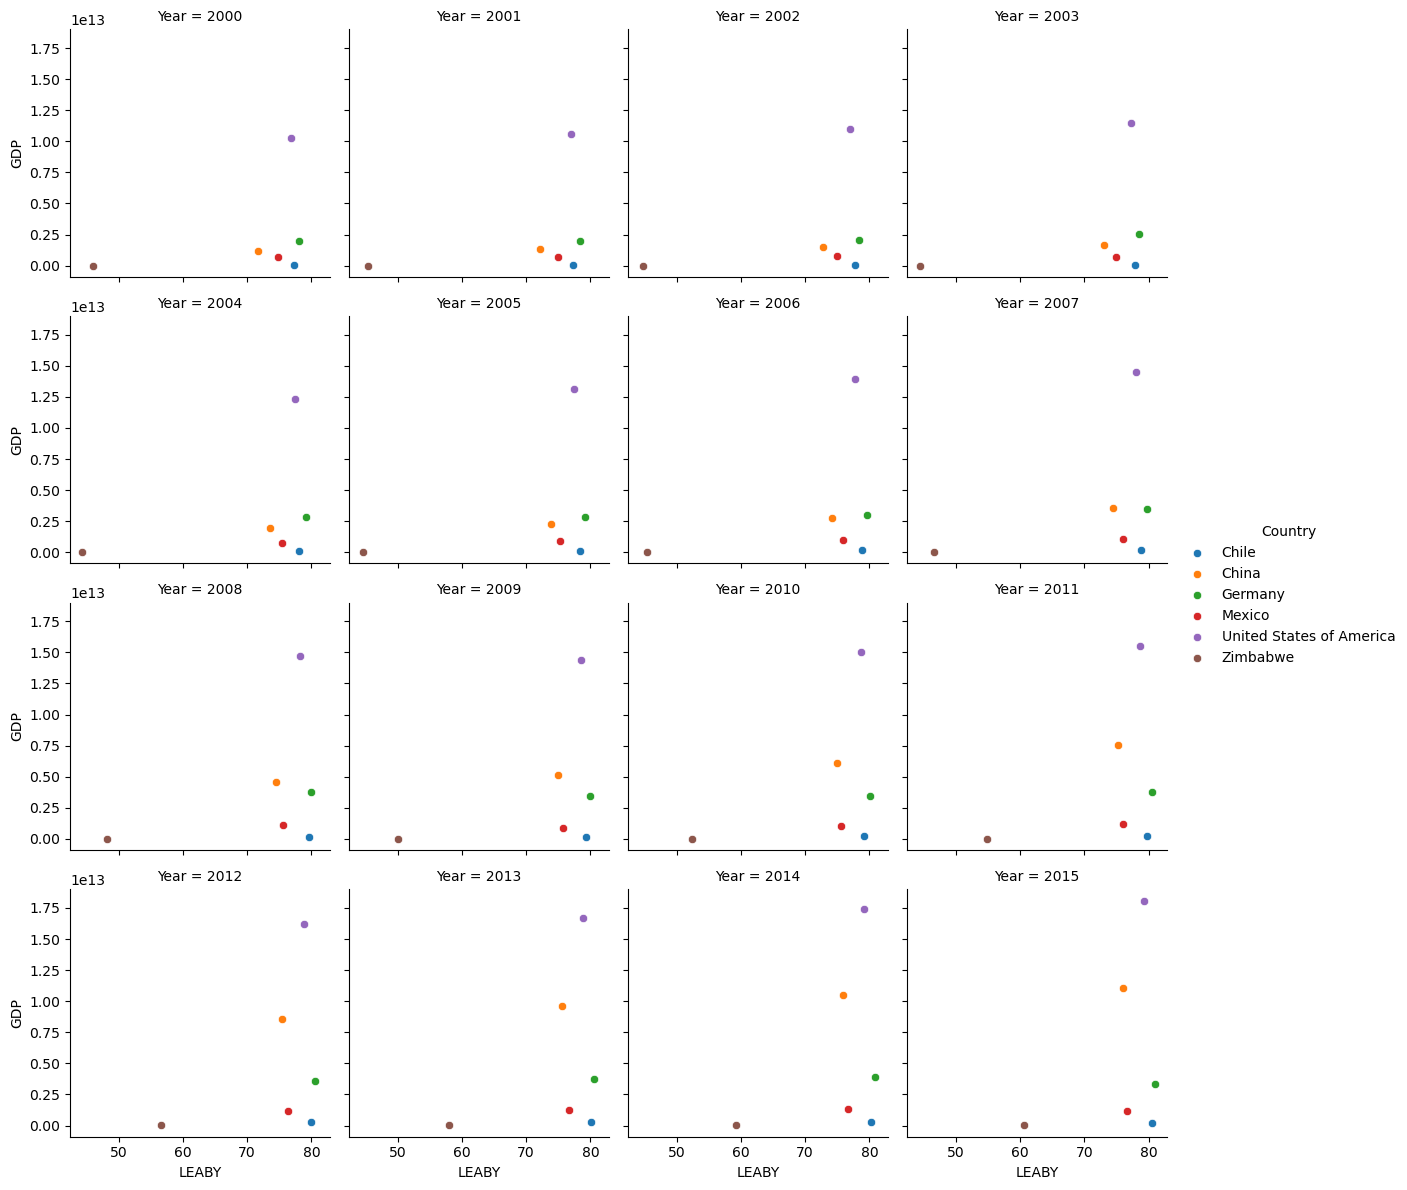

In [46]:
graph2 = sns.FacetGrid(data, col="Year", col_wrap=4,
                      hue = "Country", sharex = True)
graph2 = (graph2.map(sns.scatterplot,"LEABY", "GDP", edgecolor="w").add_legend())
     

### Line Plots for GDP
- Has GDP increased over time in the six nations?

The data explores `GDP` and `LEABY` over the years through line charts. Each country is distinguished by colours, revealing notable observations. Specifically, the US and China experienced significant advancements between 2000 and 2015. China's GDP surged from less than a quarter trillion dollars to one trillion dollars during this period, marking a remarkable increase not matched by the other countries.

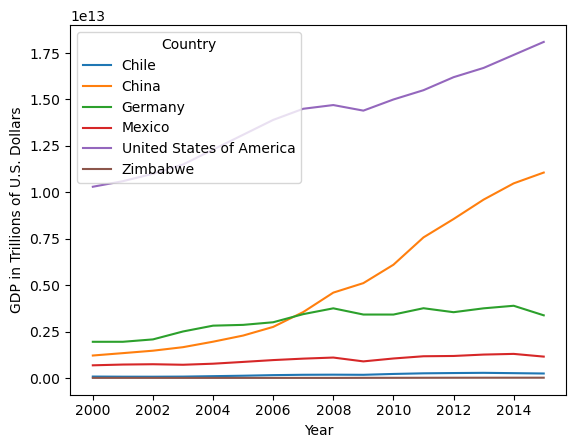

In [47]:
sns.lineplot(x=data.Year, y=data.GDP, hue=data.Country)
plt.ylabel("GDP in Trillions of U.S. Dollars")
plt.show()

Further analysis delved into faceted line charts organised by `Country`. In these individual plots, each country has its own y-axis, facilitating comparison of GDP trends over the years without uniform scaling. This approach enhances the visibility of GDP growth for all countries. While the chart above may suggest more modest GDP growth for other countries compared to China and the US, it's evident that all countries experienced growth starting from the year 2000.

/Users/joanna/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


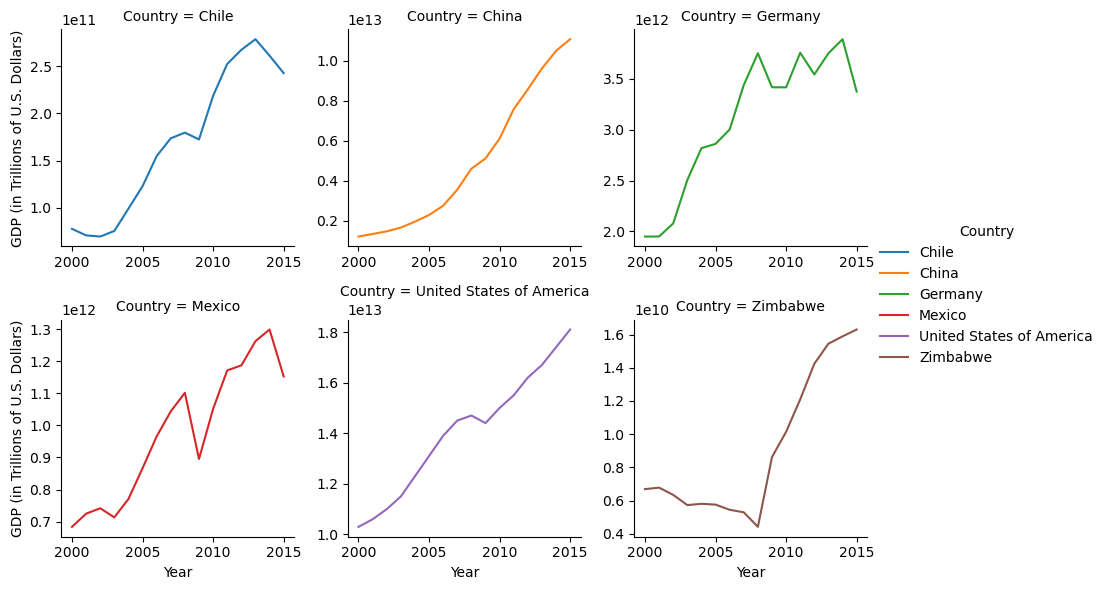

In [48]:
graphGDP = sns.FacetGrid(data, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex = False)

graphGDP.map(sns.lineplot,"Year","GDP")
graphGDP.add_legend()
graphGDP.set_axis_labels("Year","GDP (in Trillions of U.S. Dollars)")

### Line Plots for Life Expectancy
- Has life expectancy increased over time in the six nations?

The chart below focuses on life expectancy trends over the years. It reveals that each country has been steadily improving its life expectancy, with Zimbabwe experiencing the most remarkable increase, particularly noticeable after a slight decline around 2004.

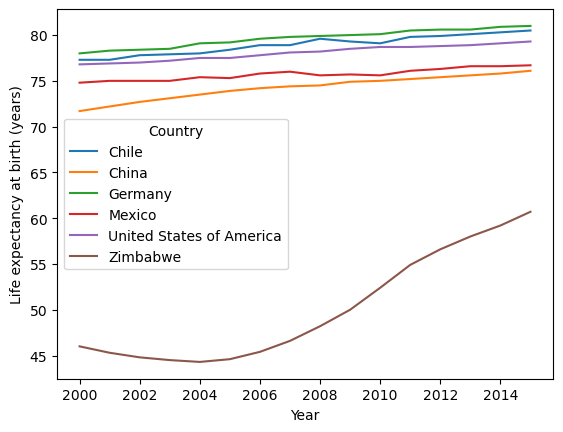

In [49]:
sns.lineplot(x=data.Year, y=data.LEABY, hue=data.Country)
plt.ylabel("Life expectancy at birth (years)")
plt.show()

The presented plot below breaks out life expectancy by country, revealing intriguing observations. Chile and Mexico notably experienced declines in life expectancy around a similar period, which could be looked into further.This style of plotting demonstrates its utility by preserving nuances that were previously obscured when sharing the y-axis among countries. Moreover, it reveals that what appeared as linear changes actually exhibited less uniformity across countries, emphasising the importance of this detailed approach.

/Users/joanna/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


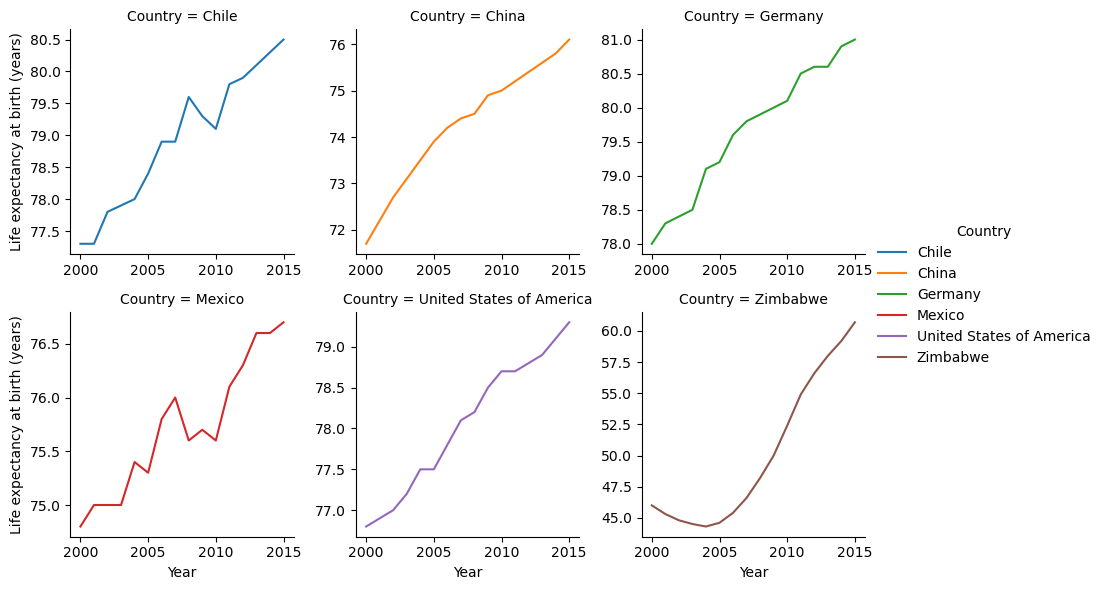

In [50]:
graphLEABY = sns.FacetGrid(data, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex = False)

graphLEABY.map(sns.lineplot,"Year","LEABY")
graphLEABY.add_legend()
graphLEABY.set_axis_labels("Year","Life expectancy at birth (years)")

### Further Research
The project successfully answer the questions addressed in the beginning. For further investigation, we could explore the events unfolding in China over the past decade, elucidating the factors contributing to a significant surge in GDP.